## Imports

In [130]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import sys
import math
#for generation symbols
from random import randint, uniform
import string, random
print(cv2.__version__)
print(np.__version__)
print(sys.version)

4.0.1
1.19.2
3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


## Functions

In [131]:
#===============================================
#Frequently used functions
#===============================================
def image_plot(img, size = (10,10), title = ''):
    fig, ax = plt.subplots(figsize=size)
    plt.title(title)
    ax.imshow(img, cmap='gray')
    plt.show()

def image_save(img, num, size = (10,10), title = ''):
    fig, ax = plt.subplots(figsize=size)
    plt.title(title)
    ax.imshow(img, cmap='gray')
    ax.set_axis_off()
    plt.savefig(f'data/rand_img_{num}',bbox_inches='tight',pad_inches=0)
    plt.show()
    
def image_to_gray(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def get_gradient(gray, x = 0, y = 0, use_grad = True):
    if use_grad:
        grad = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=x, dy=y, ksize=3)
        grad = np.absolute(grad)
        (minVal, maxVal) = (np.min(grad), np.max(grad)) 
        if maxVal - minVal > 0:
            grad = (255 * ((grad - minVal) / float(maxVal - minVal))).astype("uint8")
        else:
            grad  = np.zeros(gray.shape, dtype = "uint8")

    else:
        grad = cv2.adaptiveThreshold(  gray,
                                        255,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY_INV,
                                        11,
                                        2)

    return grad


#===============================================
#Functions by Kairat Aitpayev
#===============================================
def concat_img_hor(imgs, color = (0,255,0)):
    m = 0
    s = 0
    bs = 1
    for img in imgs:
        m = max(m, img.shape[0])
        s += img.shape[1]+2*bs

    image = np.zeros((m+2*bs, s, 3))

    x = 0
    for img in imgs:
        if len(img.shape) == 3:
            imgg = cv2.copyMakeBorder(img.copy(), bs, bs, bs, bs, cv2.BORDER_CONSTANT, value=color)
            image[0:imgg.shape[0], x:x+imgg.shape[1], :] = imgg
        else:
            imgg = cv2.copyMakeBorder(cv2.cvtColor(img, cv2.COLOR_GRAY2BGR), bs, bs, bs, bs, cv2.BORDER_CONSTANT, value=color)
            image[0:imgg.shape[0], x:x+imgg.shape[1], :] = imgg
        x += img.shape[1]+2*bs

    return np.asarray(image, dtype = np.uint8)


def concat_img_ver(imgs):
    m = 0
    s = 0
    bs = 1
    for img in imgs:
        m = max(m, img.shape[1])
        s += img.shape[0]+2*bs

    image = np.zeros((s, m+2*bs, 3))

    y = 0
    for img in imgs:
        if len(img.shape) == 3:
            imgg = cv2.copyMakeBorder(img.copy(), bs, bs, bs, bs, cv2.BORDER_CONSTANT, value=(0, 255, 0))
            image[y:y+imgg.shape[0], 0:imgg.shape[1], :] = imgg
        else:
            imgg = cv2.copyMakeBorder(cv2.cvtColor(img, cv2.COLOR_GRAY2BGR), bs, bs, bs, bs, cv2.BORDER_CONSTANT, value=(0, 255, 0))
            image[y:y+imgg.shape[0], 0:imgg.shape[1], :] = imgg
        y += img.shape[0]+2*bs

    return np.asarray(image, dtype = np.uint8)


def get_draw_proj_ver(lp, verp):
    verp2 = verp.astype(int)
    w = np.max(verp2) + 5
    graphicVer = np.zeros((lp.shape[0], w), dtype = "uint8")

    for i in range(len(verp2)):
        graphicVer[i, 0:verp2[i]] = 255

    return cv2.cvtColor(graphicVer, cv2.COLOR_GRAY2BGR)


def get_draw_proj_hor(lp, horp):
    horp2 = horp.astype(int)
    h = int(np.max(horp2) + 5)
    graphicHor = np.zeros((h, lp.shape[1]), dtype = "uint8")

    for i in range(len(horp2)):
        graphicHor[int(graphicHor.shape[0]-horp2[i]):graphicHor.shape[0], i] = 255

    return cv2.cvtColor(graphicHor, cv2.COLOR_GRAY2BGR)


def find_b0(verp_conv, ybm, c):
    for i in range(ybm,-1,-1):
        if verp_conv[i] <= c:
            return i
    return 0


def find_b1(verp_conv, ybm, c):
    for i in range(ybm,len(verp_conv)):
        if verp_conv[i] <= c:
            return i
    return len(verp_conv)



## Generating random images

<Figure size 432x288 with 0 Axes>

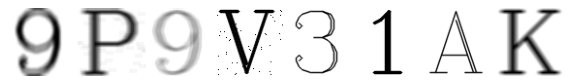

<Figure size 432x288 with 0 Axes>

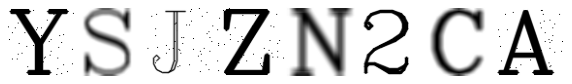

<Figure size 432x288 with 0 Axes>

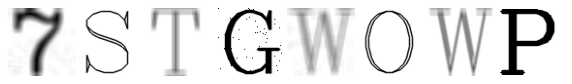

<Figure size 432x288 with 0 Axes>

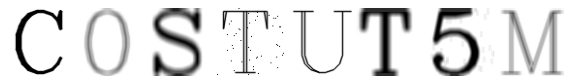

<Figure size 432x288 with 0 Axes>

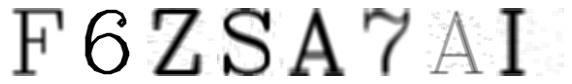

In [132]:
import genSymbolImg as gsi
image_cnt = 5
symbol_cnt = 8
for i in range(image_cnt):
    img = []
    for j in range(symbol_cnt):
        sym_img, sym_str = gsi.genSymbolImg(font=3)
        img.append(sym_img)
    img = concat_img_hor(img,(255,255,255))
    plt.savefig(f'data/rand_img_{i}')
    image_save(img, i)

## Calculate vertical projections

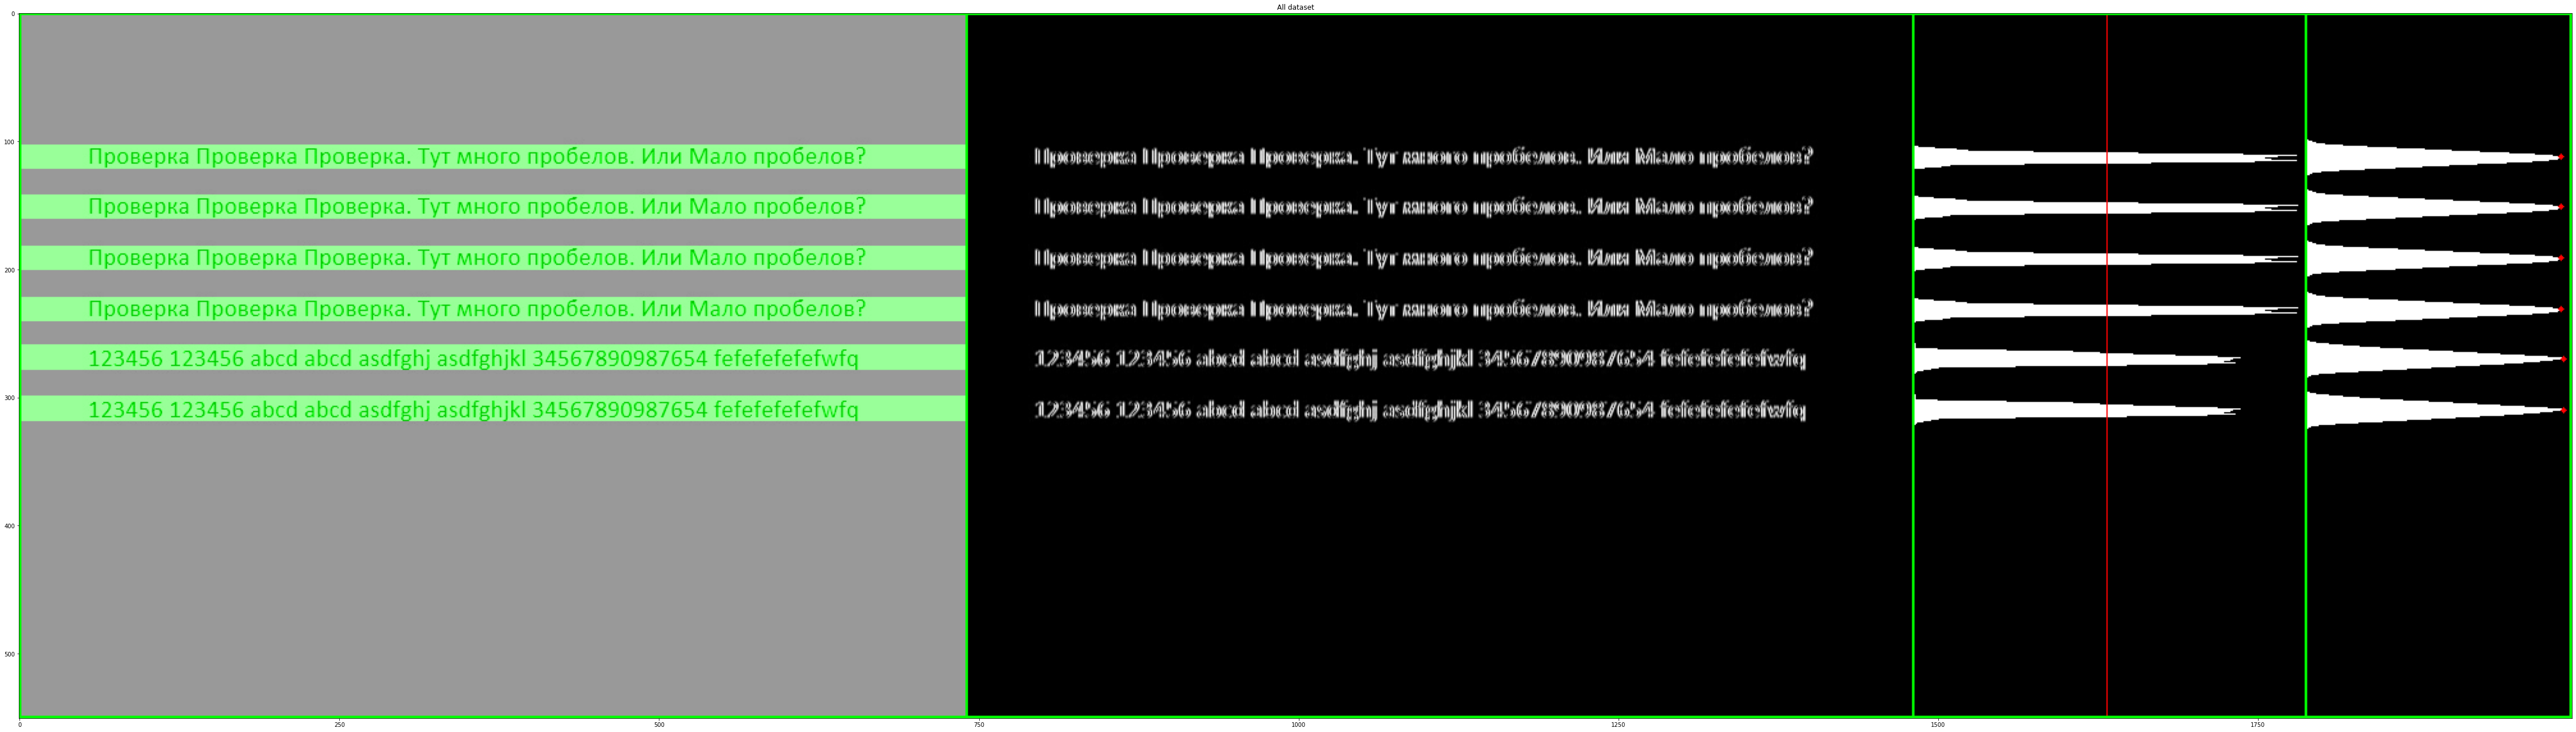

In [133]:
testing_mode = False
line_images = []
all_images = []
for i in range(1,2):
    img = cv2.imread(f'data/img{i}.jpg', 0) # read gray image
    vis = cv2.imread(f'data/img{i}.jpg') # read colored image

    grad = get_gradient(img, x = 1, use_grad = True) # trashholding image
    
    verp = np.sum(grad, axis = 1) / 255 # find vertical projection
    drawedverp = get_draw_proj_ver(img, verp) # get plot of vertical projection
    if testing_mode:
        image_plot(drawedverp,(15,15),'drawedverp') # plotting vertical projection
    
    half = int(np.max(verp)//2) # finding half of projections
    slice_line = drawedverp[:, (half-1):(half+1)] # find slice line for contours
    if testing_mode:
        image_plot(slice_line,(15,15),'slice line') # plotting slice line

    #finding contours for each line
    contours, _ = cv2.findContours(cv2.cvtColor(slice_line,cv2.COLOR_BGR2GRAY), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # add vertical line for vertical projection
    drawedverp = cv2.line(drawedverp, (half,0), (half, drawedverp.shape[0]), (255,0,0), 1)
    if testing_mode:
        image_plot(drawedverp,(15,15),'drawedverp with line') # plotting vertical projection
        
    #finding heights for median height
    heights = []
    for c in contours:
        x,y,w,h = cv2.boundingRect(c)
        heights.append(h)
    median_height = int(np.median(np.asarray(heights)) * 1.5)

    kernel = median_height # kernel based on median height
    verp_conv = np.convolve(verp, np.ones((kernel,))/kernel, mode = 'same') # convolve our vertical proj
    drawedverp_conv = get_draw_proj_ver(img, verp_conv) # get plot of convolved ver.proj.
    if testing_mode:
        image_plot(drawedverp_conv,(15,15),'convolved vertical projection') # plotting convolved vertical projection
        
    # find peaks    
    bandP1ranges = []
    peaks = []
    c1 = 0.2
    c2 = 0.3
    while np.max(verp_conv) > 5:
        ybm = np.argmax(verp_conv)
        yb0 = find_b0(verp_conv, 
                        ybm, 
                        c1 * verp_conv[ybm])
        yb1 = find_b1(verp_conv, 
                        ybm, 
                        c2 * verp_conv[ybm])
        if yb1 - yb0 > median_height:
            bandP1ranges.append((yb0,yb1))
            peaks.append((int(verp_conv[ybm]), ybm))
        verp_conv[yb0:yb1] = 0

    #draw peaks on plot
    for peak in peaks:
        cv2.circle(drawedverp_conv, peak, 2, (255,0,0), -1)
    if testing_mode:
        image_plot(drawedverp_conv,(15,15),'drawedverp_conv with peaks') # plotting convolved vertical projection
    
    # finding lines
    bands_img = np.zeros(vis.shape, dtype = np.uint8)
    for band in bandP1ranges:
        yt, yb = band
        bands_img[yt:yb] = (0,255,0)
    for band in bandP1ranges:
        y,h = band
        x,w = 0, vis.shape[1]
        line_images.append(vis[y:h, x:w])
    
    # lines highlighting
    if testing_mode:
        image_plot(vis,(15,15),'original image') # plotting original image
    vis = cv2.addWeighted(vis, 0.6, bands_img, 0.8, 0) # adding highlights
    if testing_mode:
        image_plot(vis,(15,15),'image with highlighted lines') # plotting image with highlighted lines
    
    # concatenate all operations
    res_image = concat_img_hor((vis,grad,drawedverp,drawedverp_conv))
    all_images.append(res_image)
    
#plotting all images from dataset
image_plot(concat_img_ver(all_images),(80,80),'All dataset')

## Calculate horizontal projections

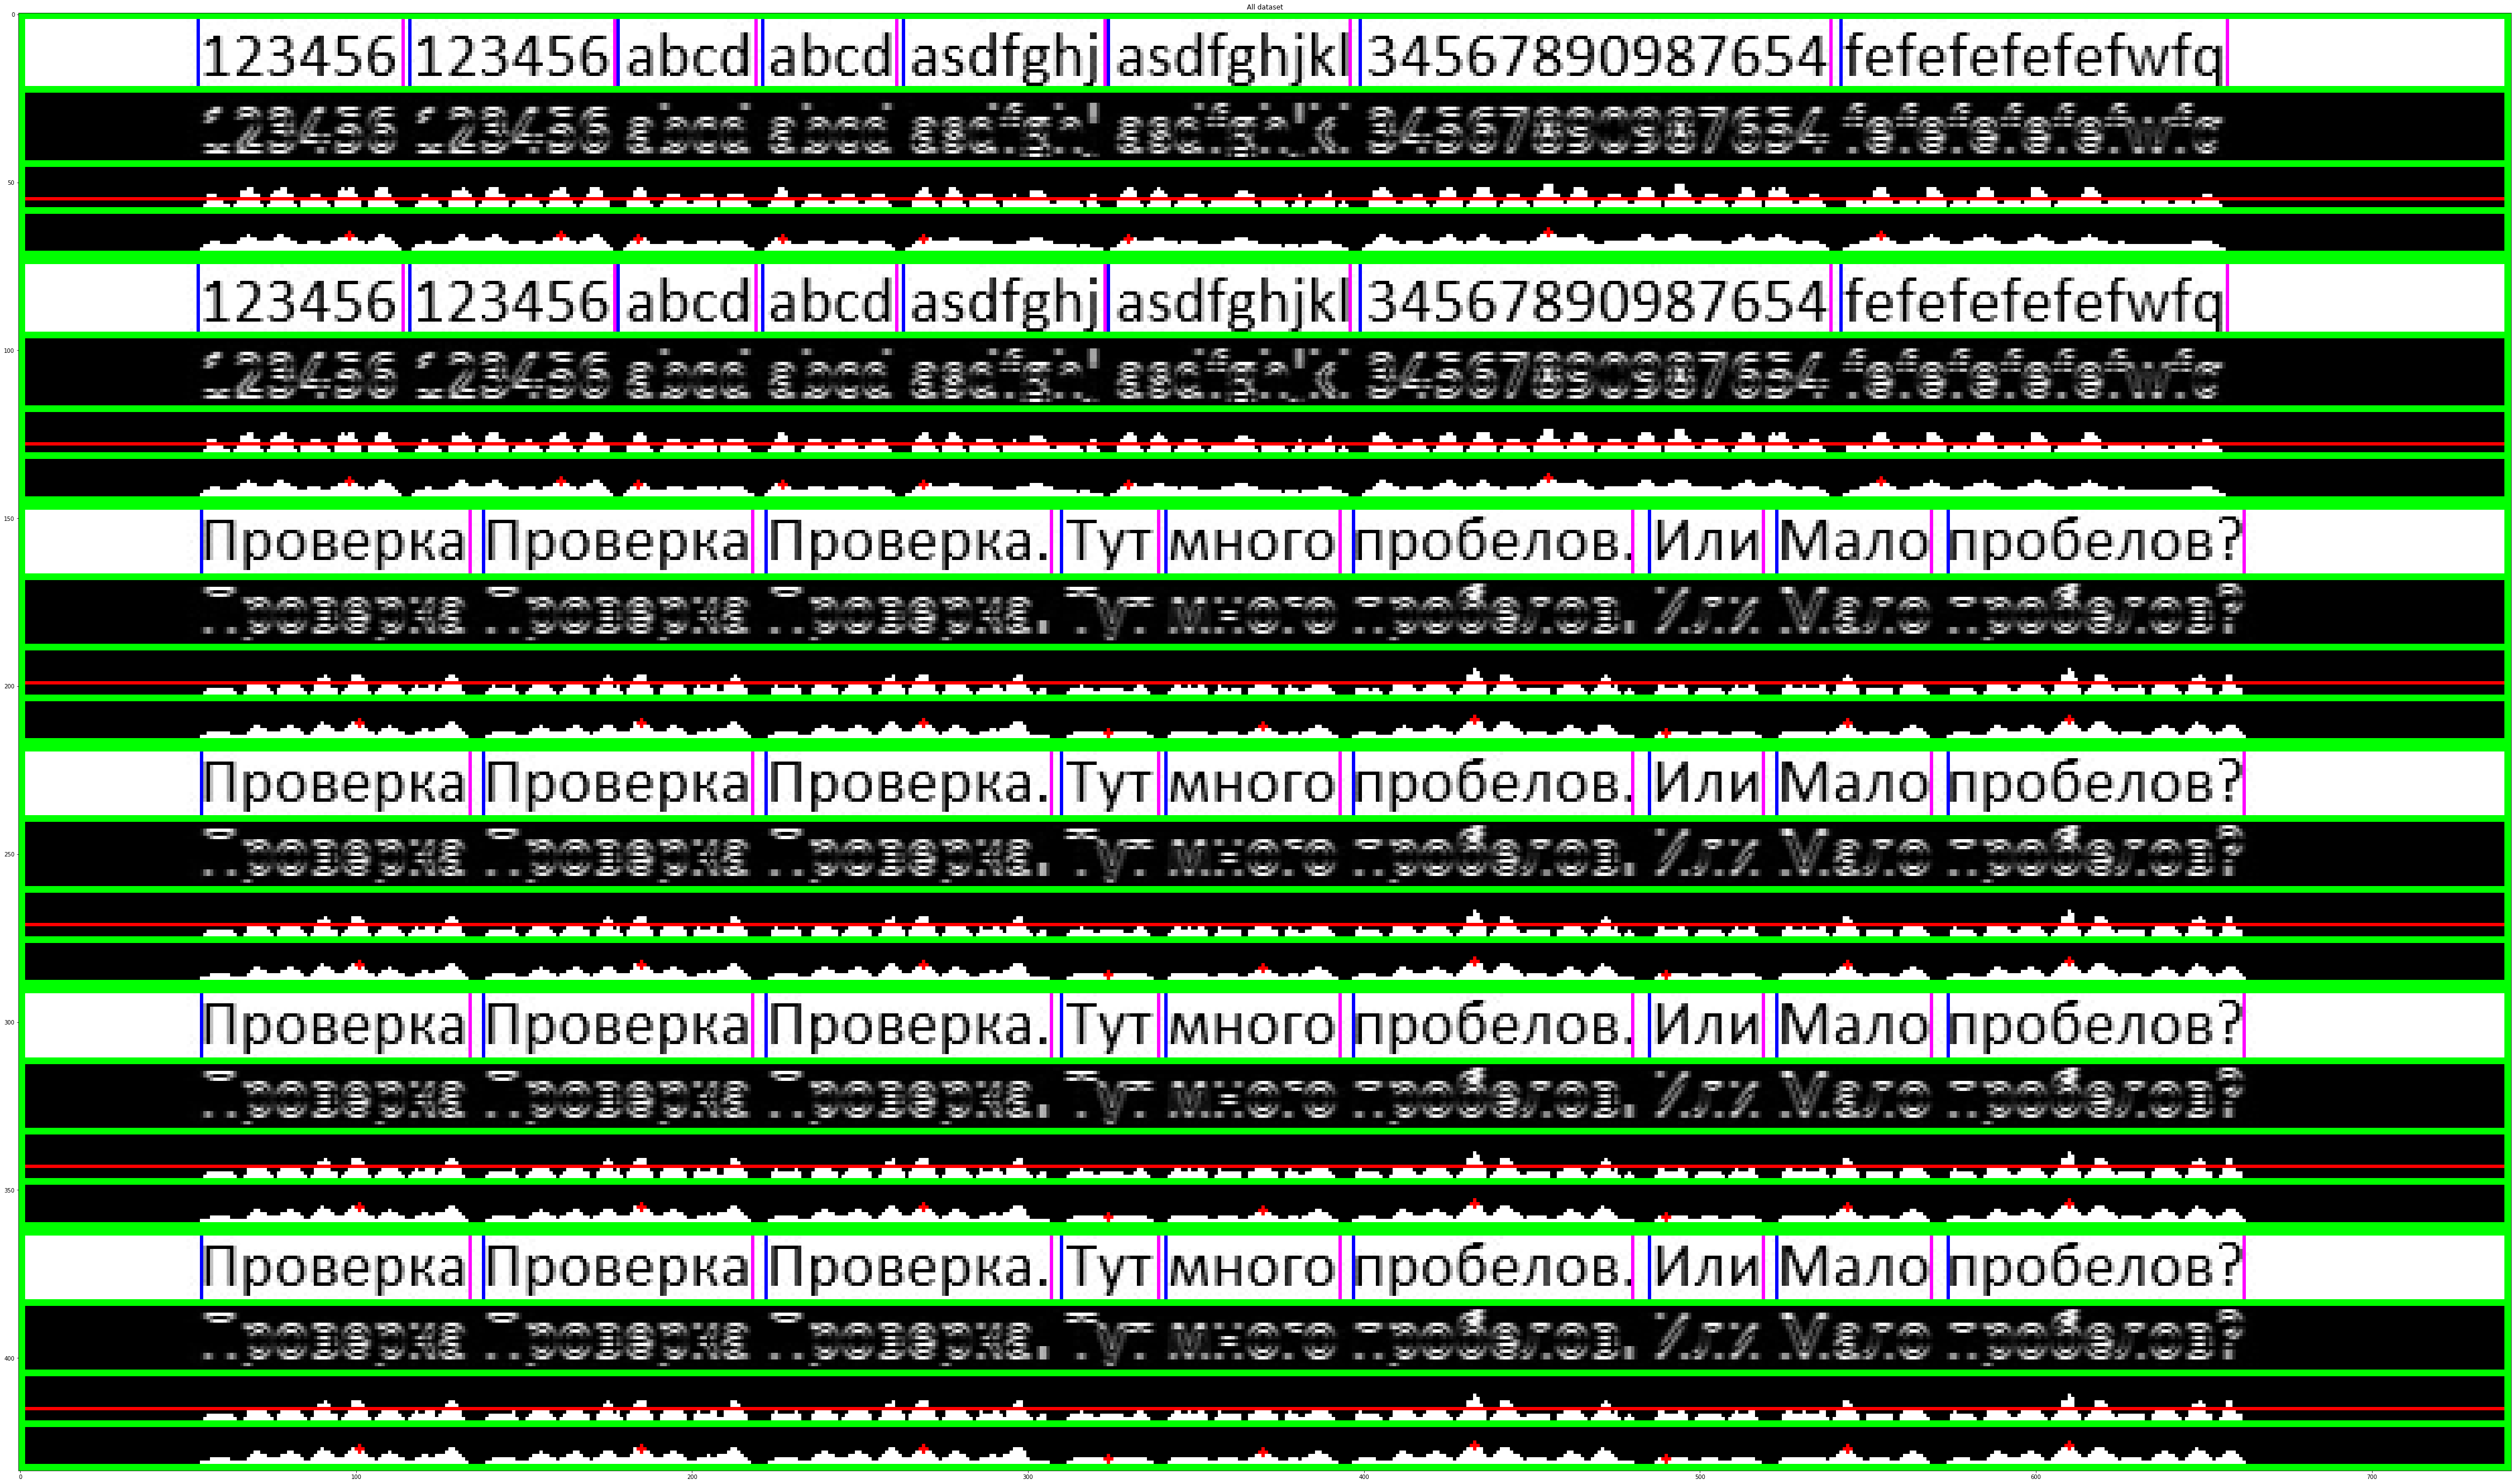

In [134]:
all_images = []
testing_mode = False
for img in line_images: ## line images from previous cell
    vis = img.copy()
    img = image_to_gray(vis)
    
    grad = get_gradient(img, y = 1, use_grad = True) # trashholding image
    
    horp = np.sum(grad, axis = 0) / 255 # find horizontal projection
    drawedhorp = get_draw_proj_hor(img, horp)  # get plot horizontal projection
    if testing_mode:
        image_plot(drawedhorp,(15,15),'drawedhorp') # plotting horizontal projection
    
    half = int(np.max(horp)//2) # finding half of projections
    slice_line = drawedhorp[(drawedhorp.shape[0] - half - 1):(drawedhorp.shape[0] - half + 1), :] # find slice line for contours
    if testing_mode:
        image_plot(slice_line,(15,15),'slice line') # plotting slice line
    
    #finding contours for each word
    contours, _ = cv2.findContours(cv2.cvtColor(slice_line,cv2.COLOR_BGR2GRAY), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # adding horizontal line
    drawedhorp = cv2.line(drawedhorp, (0,drawedhorp.shape[0] - half), (drawedhorp.shape[1], drawedhorp.shape[0] - half), (255,0,0), 1)
    if testing_mode:
        image_plot(drawedhorp,(15,15),'drawedhorp with line') # plotting horizontal projection
    
    # finding widths for medium width    
    widths = []
    for c in contours:
        x,y,w,h = cv2.boundingRect(c)
        widths.append(w)
    median_width = int(np.median(np.asarray(widths))*1.25)
    
    kernel = median_width # kernel based on median weight
    horp_conv = np.convolve(horp, np.ones((kernel,))/kernel, mode = 'same')# convolve projection
    drawedhorp_conv = get_draw_proj_hor(img, horp_conv) # get plot
    if testing_mode:
        image_plot(drawedhorp_conv,(15,15),'convolved horizontal projection') # plotting convolved vertical projection
    
    # find peaks    
    bandP1ranges = []
    peaks = []
    c1 = 0.2
    c2 = 0.2
    while np.max(horp_conv) > 1:
        ybm = np.argmax(horp_conv)
        yb0 = find_b0(horp_conv, 
                        ybm, 
                        c1 * horp_conv[ybm])
        yb1 = find_b1(horp_conv, 
                        ybm, 
                        c2 * horp_conv[ybm])
        if yb1 - yb0 > median_width:
            bandP1ranges.append((yb0,yb1))
            peaks.append((ybm,drawedhorp_conv.shape[0]-int(horp_conv[ybm])))
        horp_conv[yb0:yb1] = 0
        
    #draw peaks on plot
    for peak in peaks:
        cv2.circle(drawedhorp_conv, peak, 1, (255,0,0), -1)
    if testing_mode:
        image_plot(drawedhorp_conv,(15,15),'drawedhorp_conv with peaks') # plotting projection with peaks
    
    # Adding lines between words
    for band in bandP1ranges:
        x1, x2 = band
        cv2.line(vis, (x1,0),(x1,vis.shape[0]), (0,0,255), 1)
        cv2.line(vis, (x2,0),(x2,vis.shape[0]), (255,0,255), 1)
     
    # concatenate all operations
    res_image = concat_img_ver((vis, grad, drawedhorp, drawedhorp_conv)) # 
    all_images.append(res_image)
    
#plotting all images from dataset    
image_plot(concat_img_ver(all_images), (80,80), 'All dataset')

## Finding symbols easy way

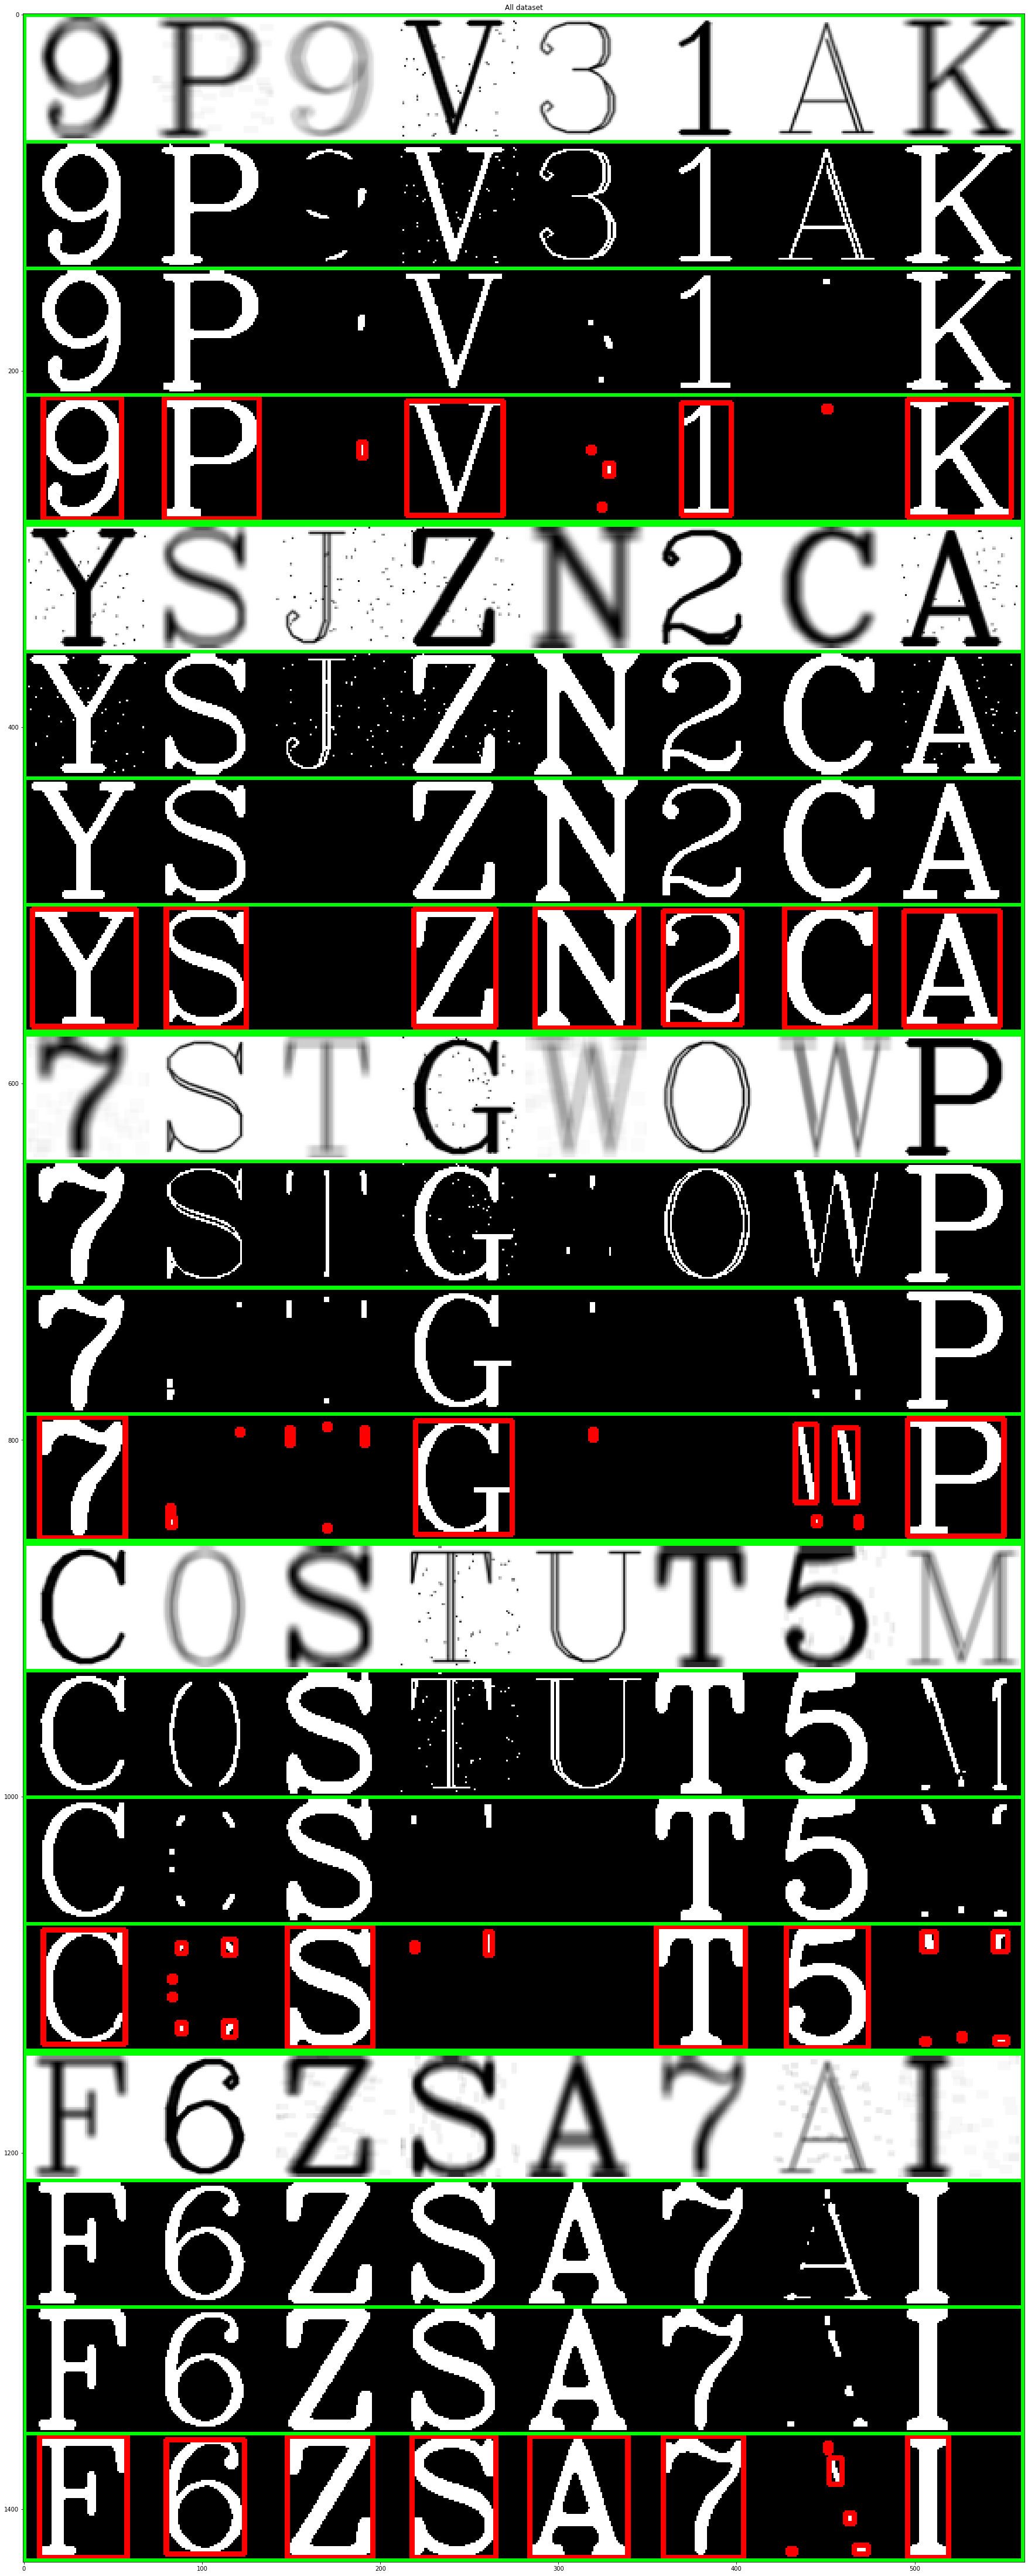

In [135]:
all_images = []
for i in range(0,5):
    img = cv2.imread(f'data/rand_img_{i}.png', 0)
    vis = cv2.imread(f'data/rand_img_{i}.png')
    # trashholding ways
    _, th = cv2.threshold(img, 0, 255,  cv2.THRESH_OTSU + 1)
#     th = cv2.adaptiveThreshold(img, 255, 
#                                  cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
#                                  cv2.THRESH_BINARY_INV,
#                          19, 4)
    
    
    kernel = np.ones((3,3), dtype = np.uint8) # kernel for morphology operation
    dst = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel, iterations=1) # do opening
    
    contours, hr = cv2.findContours(dst, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # finding contours
    dst_boxes = cv2.cvtColor(dst, cv2.COLOR_GRAY2RGB) # adding contours to plot
    
    # finding boundaries
    for c in contours:
        x,y,w,h = cv2.boundingRect(c)
        dst_boxes = cv2.rectangle(dst_boxes, (x,y), (x+w,y+h), (255,0,0), 2)
        
    res_image = concat_img_ver((vis, th, dst, dst_boxes)) # result
    all_images.append(res_image) # adding to completed data set
    
#plotting all images from dataset    
image_plot(concat_img_ver(all_images), (80,80), 'All dataset')

## Finding symbols hard way

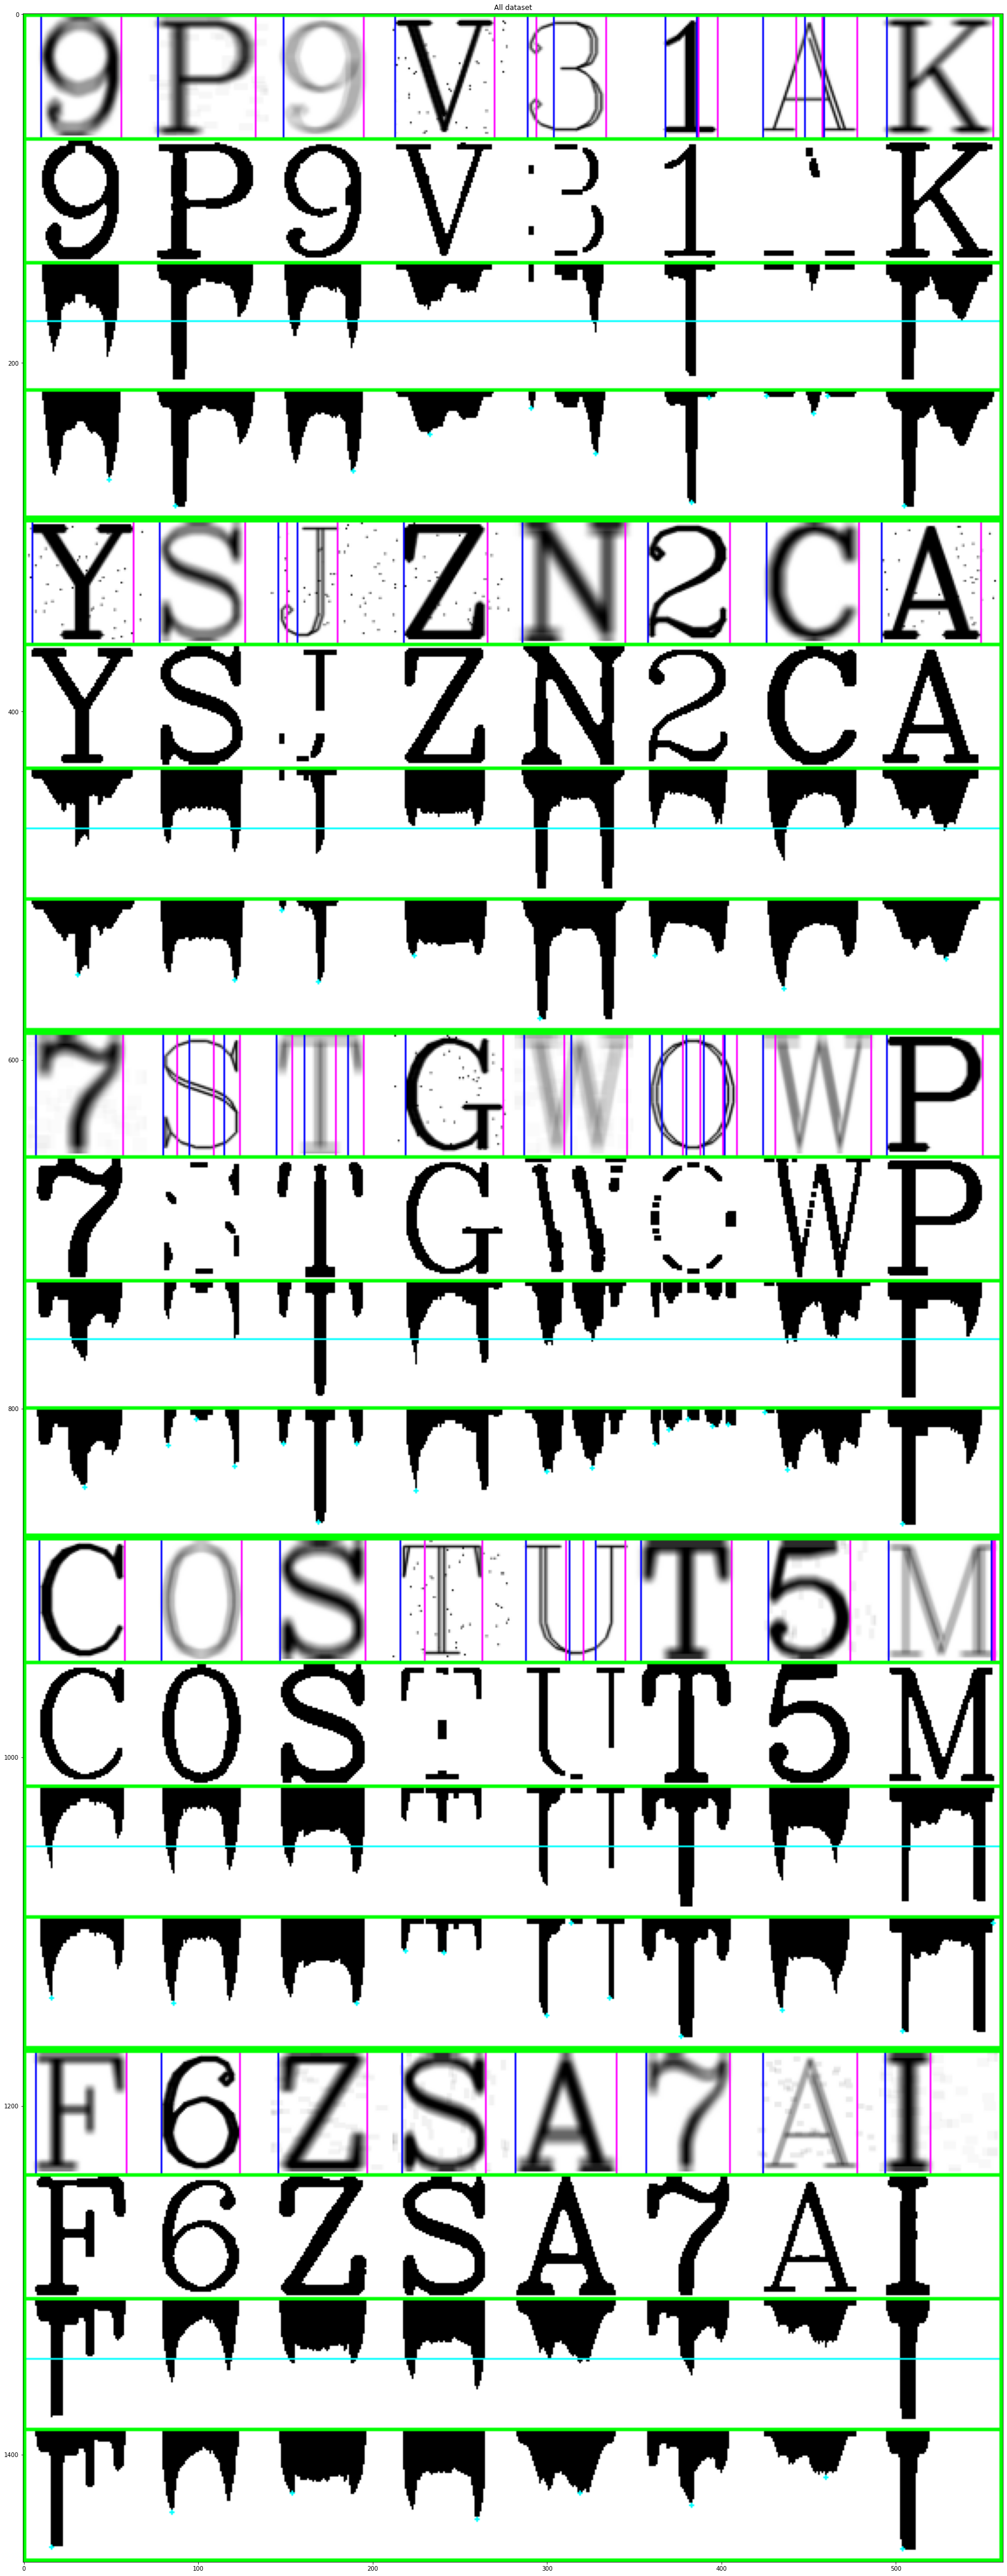

In [136]:
all_images = []
testing_mode = False
for i in range(0,5):
    img = cv2.imread(f'data/rand_img_{i}.png', 0)
    vis = cv2.imread(f'data/rand_img_{i}.png')
    
    # Trashholding trash ways
#     _, th = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)
    th = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,51,20)
    kernel = np.ones((3,3), dtype = np.uint8)
    closing = cv2.morphologyEx(th, cv2.MORPH_CLOSE, kernel, iterations=1)
#     grad = get_gradient(closing, y = 1) + get_gradient(closing, x = 1) 

    grad = closing
    grad = 255 - grad

    horp = np.sum(grad, axis = 0) / 255 # find horizontal projection
    drawedhorp = get_draw_proj_hor(img, horp)  # get plot horizontal projection
    if testing_mode:
        image_plot(drawedhorp,(15,15),'drawedhorp') # plotting horizontal projection
    
    half = int(np.max(horp)//2) # finding half of projections
    slice_line = drawedhorp[(drawedhorp.shape[0] - half - 1):(drawedhorp.shape[0] - half + 1), :] # find slice line for contours
    if testing_mode:
        image_plot(slice_line,(15,15),'slice line') # plotting slice line
    
    #finding contours for each word
    contours, _ = cv2.findContours(cv2.cvtColor(slice_line,cv2.COLOR_BGR2GRAY), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # adding horizontal line
    drawedhorp = cv2.line(drawedhorp, (0,drawedhorp.shape[0] - half), (drawedhorp.shape[1], drawedhorp.shape[0] - half), (255,0,0), 1)
    if testing_mode:
        image_plot(drawedhorp,(15,15),'drawedhorp with line') # plotting horizontal projection
    
    # finding widths for medium width    
    widths = []
    for c in contours:
        x,y,w,h = cv2.boundingRect(c)
        widths.append(w)
    median_width = int(np.median(np.asarray(widths))*0.3)
    
    kernel = median_width # kernel based on median weight
    horp_conv = np.convolve(horp, np.ones((kernel,))/kernel, mode = 'same')# convolve projection
    drawedhorp_conv = get_draw_proj_hor(img, horp_conv) # get plot
    if testing_mode:
        image_plot(drawedhorp_conv,(15,15),'convolved horizontal projection') # plotting convolved vertical projection
    
    # find peaks    
    bandP1ranges = []
    peaks = []
    c1 = 0.05
    c2 = 0.05
    while np.max(horp_conv) > 1:
        ybm = np.argmax(horp_conv)
        yb0 = find_b0(horp_conv, 
                        ybm, 
                        c1 * horp_conv[ybm])
        yb1 = find_b1(horp_conv, 
                        ybm, 
                        c2 * horp_conv[ybm])
        if yb1 - yb0 > median_width:
            bandP1ranges.append((yb0,yb1))
            peaks.append((ybm,drawedhorp_conv.shape[0]-int(horp_conv[ybm])))
        horp_conv[yb0:yb1] = 0
        
    #draw peaks on plot
    for peak in peaks:
        cv2.circle(drawedhorp_conv, peak, 1, (255,0,0), -1)
    if testing_mode:
        image_plot(drawedhorp_conv,(15,15),'drawedhorp_conv with peaks') # plotting projection with peaks
    
    # Adding lines between words
    for band in bandP1ranges:
        x1, x2 = band
        cv2.line(vis, (x1,0),(x1,vis.shape[0]), (0,0,255), 1)
        cv2.line(vis, (x2,0),(x2,vis.shape[0]), (255,0,255), 1)
     
    grad = 255 - grad
    
    drawedhorp = 255- drawedhorp
    drawedhorp = drawedhorp[::-1]
    
    drawedhorp_conv = 255- drawedhorp_conv
    drawedhorp_conv = drawedhorp_conv[::-1]
    
    # concatenate all operations
    res_image = concat_img_ver((vis, closing, drawedhorp, drawedhorp_conv)) # 
    all_images.append(res_image)
    
#plotting all images from dataset    
image_plot(concat_img_ver(all_images), (80,80), 'All dataset')